### TP 2: Visión por Computadora

Alumnos: Fabricio Lopretto (a1616), Santiago José Olaciregui (a1611)


Objetivo:
Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan lascámaras digitales modernas. El video a procesar será: “focus_video.mov”.

1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper"ImageSharpnessMeasureforBlurredImagesin FrequencyDomain“ y realizar tres experimentos:

1.1 Medición sobre todo el frame.

1.2 Medición sobre una ROI ubicada en el centro del frame. Areade la ROI = 5 o 10% del areatotal del frame.

1.3 Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc… (al menos 3).

Para cada experimento se debe presentar :

- Una curva o varias curvas que muestren la evolución de la métrica framea framedonde se vea claramente cuando el algoritmo detecto el punto de máximo enfoque.

- Video con la ROI o matriz, graficada en rojo y superpuesta al video original para los framesque no están en foco y verde para los framesdonde se detecta la condición de máximo enfoque.

Observaciones: A partir de la publicación mencionada, se toma el siguiente algoritmo para el cálculo de la métrica de interés.

Input: Image I of size M×N.
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure

Paso 1: Calcular F, que es la representación de la transformada de Fourier de la imagen I.

Paso 2: Encuentra Fc que se obtiene desplazando el origen de F al centro.

Paso 3: Calcular AF = abs (Fc) donde AF es el valor absoluto de la transformada de Fourier centrada de la imagen I.

Paso 4: Calcular M = máx (AF) donde M es el valor máximo del componente de frecuencia en F.

Paso 5: Calcular TH = el número total de píxeles en F cuyo valor de píxel > thres, donde thres = M/1000.

Paso 6: Calcule la medida de calidad de imagen (FM) a partir de la ecuación (1).

Image Quality Image (FM) = TH / M.N     (1)

In [1]:
# Instala las librerias necesarias
!pip install opencv-python


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importa las librerias necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

1.1 Medición sobre todo el Frame

In [3]:
def calcular_sharpness_FM(frame):
    """
    Calcula la métrica de nitidez (FM) basada en el paper.

    """

    # Convierte el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtiene el tamaño de la imagen
    M, N = gray.shape
    
    # Obtiene la Transformada de Fourier
    F = np.fft.fft2(gray)
    
    # Shift para centrar la transformada en bajas frecuencias
    Fc = np.fft.fftshift(F)
    
    # Calcula el valor absoluto del espectro de frecuencias
    AF = np.abs(Fc)
    
    # Encuntra el valor maximo del espectro
    M_value = np.max(AF)
    
    # Calcula el umbral thres = M / 1000
    thres = M_value / 1000
    
    # Cuenta los pixeles que superan el umbral
    TH = np.sum(AF > thres)
    
    # Calcula la medida de nitidez (FM)
    FM = TH / (M * N)
    
    return FM


In [4]:
# Capta la ruta de la notebook
ruta_notebook = os.getcwd()

# Describe la ruta al video
video_path = ruta_notebook + '/focus_video.mov'

In [5]:
# Abre el video
cap = cv2.VideoCapture(video_path)

In [6]:
# Listas para almacenar las metricas de nitidez y los frames correspondientes
sharpness_metrics = []
frames_list = []

In [7]:
# Lee el video frame a frame
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Calcula la metrica de nitidez para el frame actual
    sharpness_metric = calcular_sharpness_FM(frame)
    
    # Almacena la metrica y el frame actual
    sharpness_metrics.append(sharpness_metric)
    frames_list.append(frame)
    
    # Imprime el progreso
    print(f'Frame {frame_id}: Sharpness (FM) = {sharpness_metric}')
    frame_id += 1

# Libera el objeto de video
cap.release()

Frame 0: Sharpness (FM) = 0.007122395833333333
Frame 1: Sharpness (FM) = 0.007139756944444444
Frame 2: Sharpness (FM) = 0.007131076388888889
Frame 3: Sharpness (FM) = 0.007096354166666667
Frame 4: Sharpness (FM) = 0.0070182291666666665
Frame 5: Sharpness (FM) = 0.006983506944444444
Frame 6: Sharpness (FM) = 0.006983506944444444
Frame 7: Sharpness (FM) = 0.006888020833333334
Frame 8: Sharpness (FM) = 0.006896701388888889
Frame 9: Sharpness (FM) = 0.006861979166666666
Frame 10: Sharpness (FM) = 0.006844618055555555
Frame 11: Sharpness (FM) = 0.006844618055555555
Frame 12: Sharpness (FM) = 0.006844618055555555
Frame 13: Sharpness (FM) = 0.006888020833333334
Frame 14: Sharpness (FM) = 0.006905381944444444
Frame 15: Sharpness (FM) = 0.006818576388888889
Frame 16: Sharpness (FM) = 0.006861979166666666
Frame 17: Sharpness (FM) = 0.006879340277777778
Frame 18: Sharpness (FM) = 0.006888020833333334
Frame 19: Sharpness (FM) = 0.006888020833333334
Frame 20: Sharpness (FM) = 0.006861979166666666
F

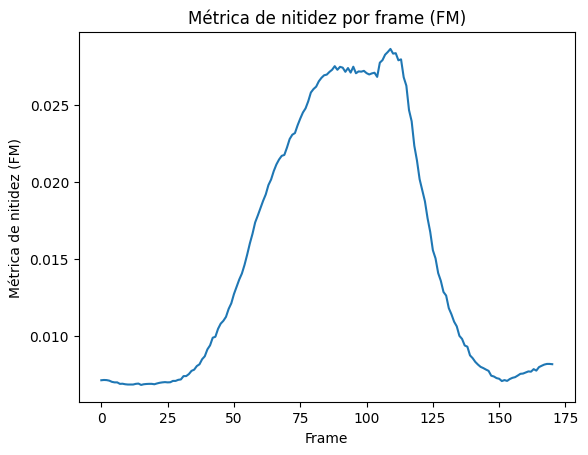

In [8]:
# Grafica las metricas de nitidez
plt.plot(sharpness_metrics)
plt.title('Métrica de nitidez por frame (FM)')
plt.xlabel('Frame')
plt.ylabel('Métrica de nitidez (FM)')
plt.show()

In [9]:
# Encuentra el frame con el maximo enfoque
max_sharpness_idx = np.argmax(sharpness_metrics)
print(f'El frame con máximo enfoque es el {max_sharpness_idx}, con una métrica de {sharpness_metrics[max_sharpness_idx]}')

El frame con máximo enfoque es el 109, con una métrica de 0.028624131944444443


In [10]:
# Muestra el frame con maximo enfoque
cv2.imshow('Frame con maximo enfoque', frames_list[max_sharpness_idx])
cv2.waitKey(0)
cv2.destroyAllWindows()

1.2 Medición sobre una ROI ubicada en el centro del frame. Área de la ROI = 5 o 10% del área total del frame: Se elige 5%.

In [11]:
def calcular_sharpness_FM_ROI(frame, roi_percentage=0.05):
    """ 
    Calcula la métrica de nitidez (FM) en una ROI determinada.
    
    """

    # Convierte el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtiene el tamaño de la imagen
    M, N = gray.shape
    
    # Define el tamaño de la ROI basado en el porcentaje dado
    roi_size = int(np.sqrt(roi_percentage * M * N))
    start_row = (M - roi_size) // 2
    start_col = (N - roi_size) // 2
    
    # Extrae la ROI
    roi = gray[start_row:start_row+roi_size, start_col:start_col+roi_size]
    
    # Transformada de Fourier
    F = np.fft.fft2(roi)
    
    # Shift para centrar la transformada
    Fc = np.fft.fftshift(F)
    
    # Calcula el valor absoluto del espectro de frecuencias
    AF = np.abs(Fc)
    
    # Encuntra el valor maximo del espectro
    M_value = np.max(AF)
    
    # Calcula el umbral thres = M / 1000
    thres = M_value / 1000
    
    # Cuenta los pixeles que superan el umbral
    TH = np.sum(AF > thres)
    
    # Calcula la medida de nitidez (FM)
    FM = TH / (roi_size * roi_size)
    
    return FM


In [12]:
# Abre el video
cap = cv2.VideoCapture(video_path)

In [13]:
# Parametros
roi_percentage = 0.05
output_video_path = ruta_notebook + '/output_with_roi.avi'

In [14]:
# Obtiene propiedades del video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [15]:
# Crea el objeto VideoWriter para guardar el video modificado
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [16]:
# Listas para almacenar las metricas de nitidez y los frames correspondientes
sharpness_metrics = []
frames_list = []

In [17]:
# Lee el video frame a frame
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Calcula la metrica de nitidez para el frame actual usando ROI del 5%
    sharpness_metric = calcular_sharpness_FM_ROI(frame, roi_percentage=0.05)
    
    # Almacena la metrica y el frame actual
    sharpness_metrics.append(sharpness_metric)
    frames_list.append(frame)
    
    # Imprime el progreso
    print(f'Frame {frame_id}: Sharpness (FM) = {sharpness_metric}')
    frame_id += 1


Frame 0: Sharpness (FM) = 0.07852214167176172
Frame 1: Sharpness (FM) = 0.0792208926543803
Frame 2: Sharpness (FM) = 0.0792208926543803
Frame 3: Sharpness (FM) = 0.07590182548694209
Frame 4: Sharpness (FM) = 0.07625120097825137
Frame 5: Sharpness (FM) = 0.07590182548694209
Frame 6: Sharpness (FM) = 0.07642588872390602
Frame 7: Sharpness (FM) = 0.07537776224997816
Frame 8: Sharpness (FM) = 0.07660057646956066
Frame 9: Sharpness (FM) = 0.0746790112673596
Frame 10: Sharpness (FM) = 0.07502838675866888
Frame 11: Sharpness (FM) = 0.07275744606515853
Frame 12: Sharpness (FM) = 0.07275744606515853
Frame 13: Sharpness (FM) = 0.07188400733688531
Frame 14: Sharpness (FM) = 0.07170931959123067
Frame 15: Sharpness (FM) = 0.07153463184557603
Frame 16: Sharpness (FM) = 0.07153463184557603
Frame 17: Sharpness (FM) = 0.07275744606515853
Frame 18: Sharpness (FM) = 0.07293213381081318
Frame 19: Sharpness (FM) = 0.07170931959123067
Frame 20: Sharpness (FM) = 0.0734561970477771
Frame 21: Sharpness (FM) = 

In [18]:
# Libera el objeto de video
cap.release()

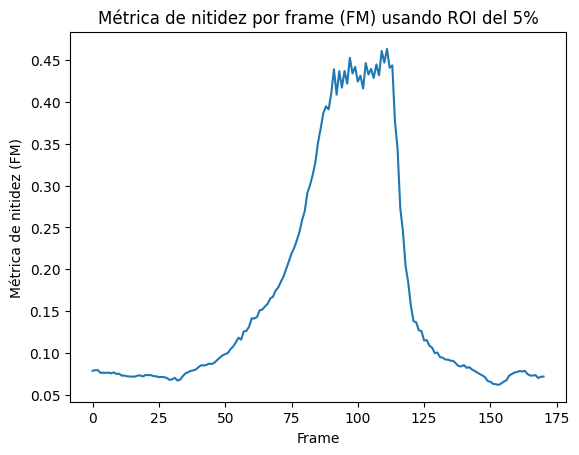

In [19]:
# Grafica las metricas de nitidez
plt.plot(sharpness_metrics)
plt.title('Métrica de nitidez por frame (FM) usando ROI del 5%')
plt.xlabel('Frame')
plt.ylabel('Métrica de nitidez (FM)')
plt.show()

In [20]:
# Encuentra el frame con el maximo enfoque
max_sharpness_idx = np.argmax(sharpness_metrics)
print(f'El frame con máximo enfoque es el {max_sharpness_idx}, con una métrica de {sharpness_metrics[max_sharpness_idx]}')

El frame con máximo enfoque es el 111, con una métrica de 0.4635339330945934


In [21]:
# Muestra el frame con maximo enfoque
cv2.imshow('Frame con maximo enfoque', frames_list[max_sharpness_idx])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Reabre el video para superponer las ROI
cap = cv2.VideoCapture(video_path)

In [23]:
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Define la ROI
    M, N = frame.shape[:2]
    roi_size = int(np.sqrt(roi_percentage * M * N))
    start_row = (M - roi_size) // 2
    start_col = (N - roi_size) // 2
    end_row = start_row + roi_size
    end_col = start_col + roi_size
    
    # Dibuja el rectangulo ROI
    color = (0, 255, 0) if frame_id == max_sharpness_idx else (0, 0, 255)
    cv2.rectangle(frame, (start_col, start_row), (end_col, end_row), color, 2)
    
    # Guarda el frame en el nuevo video
    out.write(frame)
    
    frame_id += 1


In [24]:
# Libera el objeto de video
cap.release()
out.release()

In [25]:
print(f'Video guardado como {output_video_path}')

Video guardado como c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_with_roi.avi


1.3.a Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores. En este caso usamos 3x3.

In [26]:
def compute_fm(image):
    """
    Calcula la métrica de nitidez (FM).
    
    """
    image = image.astype(np.float32)
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    thres = M / 1000
    TH = np.sum(AF > thres)
    N = image.size
    FM = TH / (M * N)
    return FM


In [27]:
def process_video(video_path):
    """
    Calcula para cada bloque, en cada frame, el valor de la métrica.
    
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Número Total de frames: {frame_count}")
    fm_values = np.zeros((frame_count, 9))

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray_frame.shape
        block_h, block_w = h // 3, w // 3
        
        for i in range(3):
            for j in range(3):
                block = gray_frame[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w]
                fm = compute_fm(block)
                if current_frame < frame_count:
                    fm_values[current_frame, i*3 + j] = fm
                else:
                    print(f"Advertencia: Frame index {current_frame} fuera de límites.")
        
        current_frame += 1

    cap.release()
    return fm_values


In [28]:
def plot_fm(fm_values):
    """
    Grafica para cada bloque la variación de la métrica en función del frame.

    """
    frame_indices = np.arange(fm_values.shape[0])
    plt.figure(figsize=(12, 8))
    
    for i in range(fm_values.shape[1]):
        plt.plot(frame_indices, fm_values[:, i], label=f'Bloque {i + 1}')
    
    plt.xlabel('Índice del Frame')
    plt.ylabel('Métrica de Nitidez (FM)')
    plt.title('Variación de la Métrica de Nitidez en Función del Frame')
    plt.legend()
    plt.grid(True)
    plt.show()


In [29]:
def print_max_fm(fm_values):
    """
    Almacena e imprime los frames donde se alcanza la máxima métrica
    de nitidez para cada bloque.

    """
    max_frame_matrix = np.zeros((3, 3), dtype=int)
    for i in range(fm_values.shape[1]):
        max_value = np.max(fm_values[:, i])
        max_frame = np.argmax(fm_values[:, i])
        row, col = divmod(i, 3)
        max_frame_matrix[row, col] = max_frame
        print(f'Bloque {i + 1}: Frame {max_frame} - FM máximo: {max_value:.10f}')
    
    print("Matriz de frames con el máximo FM para cada bloque (3x3):")
    print(max_frame_matrix)
    
    return max_frame_matrix


In [30]:
def highlight_blocks(video_path, max_frame_matrix, output_path):
    """
    Crea el video de salida donde se resaltan en verde los frames
    cuando cada bloque alcanza el máximo valor de la métrica de nitidez
    que le corresponde.
    
    """
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    block_h, block_w = h // 3, w // 3

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Draw grid
        for i in range(1, 3):
            cv2.line(frame, (0, i * block_h), (w, i * block_h), (0, 0, 255), 2)  # Red horizontal line
            cv2.line(frame, (i * block_w, 0), (i * block_w, h), (0, 0, 255), 2)  # Red vertical line
        
        # Highlight block edges in green if the current frame matches max_frame_matrix
        for i in range(3):
            for j in range(3):
                if current_frame == max_frame_matrix[i, j]:
                    cv2.line(frame, (j * block_w, i * block_h), ((j + 1) * block_w, i * block_h), (0, 255, 0), 2)  # Green top edge
                    cv2.line(frame, (j * block_w, (i + 1) * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green bottom edge
                    cv2.line(frame, (j * block_w, i * block_h), (j * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green left edge
                    cv2.line(frame, ((j + 1) * block_w, i * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green right edge

        out.write(frame)
        current_frame += 1

    cap.release()
    out.release()
    print(f"Output video saved to {output_path}")


Número Total de frames: 171


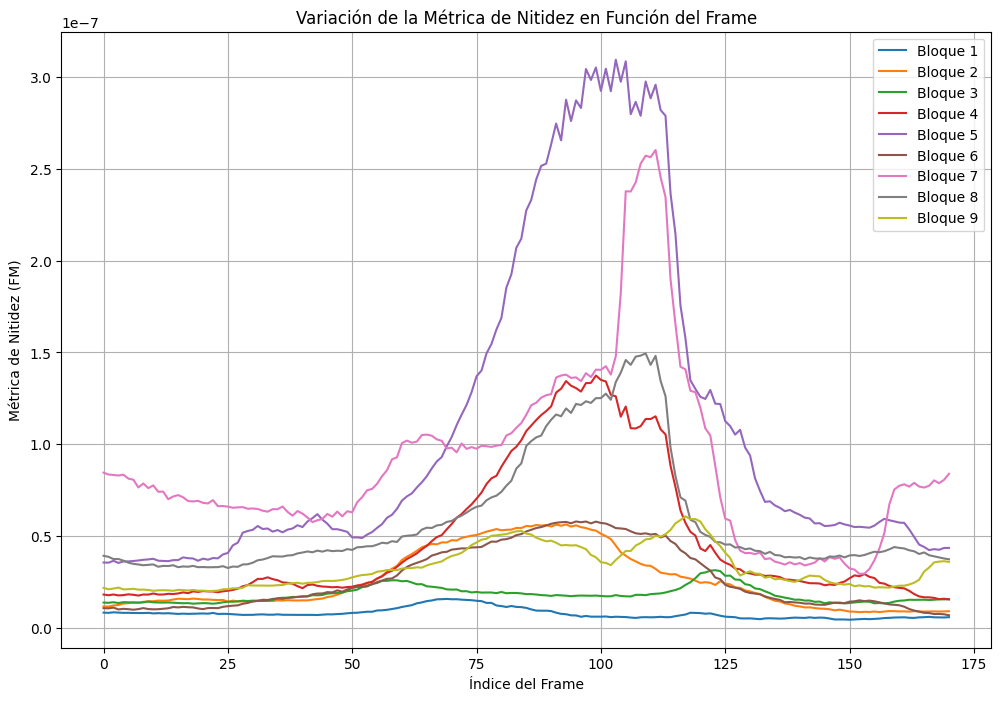

Bloque 1: Frame 69 - FM máximo: 0.0000000156
Bloque 2: Frame 93 - FM máximo: 0.0000000562
Bloque 3: Frame 123 - FM máximo: 0.0000000313
Bloque 4: Frame 99 - FM máximo: 0.0000001374
Bloque 5: Frame 103 - FM máximo: 0.0000003096
Bloque 6: Frame 95 - FM máximo: 0.0000000579
Bloque 7: Frame 111 - FM máximo: 0.0000002604
Bloque 8: Frame 109 - FM máximo: 0.0000001495
Bloque 9: Frame 117 - FM máximo: 0.0000000607
Matriz de frames con el máximo FM para cada bloque (3x3):
[[ 69  93 123]
 [ 99 103  95]
 [111 109 117]]
Output video saved to c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_with_3x3.avi


In [31]:
output_path = ruta_notebook + "/output_with_3x3.avi"  # El archivo de salida con los bordes resaltados
fm_values = process_video(video_path)
plot_fm(fm_values)
max_frame_matrix = print_max_fm(fm_values)
highlight_blocks(video_path, max_frame_matrix, output_path)

Considerando que:

|Bloque|Posición                   |
|------|---------------------------|
|1     |Esquina superior izquierda.| 
|2     |Parte superior central.    |
|3     |Esquina superior derecha.  |
|4     |Parte central izquierda.   |
|5     |Parte central central.     |
|6     |Parte central derecha.     |
|7     |Esquina inferior izquierda.|
|8     |Parte inferior central.    |
|9     |Esquina inferior derecha.  |

1.3.b Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores. En este caso usamos 2x3.

In [ ]:
"""La función para computar la métrica no se modifica"""

In [32]:
def process_video(video_path):
    """
    Calcula para cada bloque, en cada frame, el valor de la métrica.
    
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {frame_count}")
    fm_values = np.zeros((frame_count, 6))  # Update to 6 blocks

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray_frame.shape
        block_h, block_w = h // 2, w // 3  # Adjust block size for 2x3 partition
        
        for i in range(2):
            for j in range(3):
                block = gray_frame[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w]
                fm = compute_fm(block)
                if current_frame < frame_count:
                    fm_values[current_frame, i*3 + j] = fm
                else:
                    print(f"Warning: Frame index {current_frame} is out of bounds.")
        
        current_frame += 1

    cap.release()
    return fm_values


In [33]:
def print_max_fm(fm_values):
    """
    Almacena e imprime los frames donde se alcanza la máxima métrica
    de nitidez para cada bloque.

    """
    max_frame_matrix = np.zeros((2, 3), dtype=int)  # Update to 2x3 matrix
    for i in range(fm_values.shape[1]):
        max_value = np.max(fm_values[:, i])
        max_frame = np.argmax(fm_values[:, i])
        row, col = divmod(i, 3)
        max_frame_matrix[row, col] = max_frame
        print(f'Bloque {i + 1}: Frame {max_frame} - FM máximo: {max_value:.10f}')
    
    print("Matriz de frames con el máximo FM para cada bloque (2x3):")
    print(max_frame_matrix)
    
    return max_frame_matrix


In [40]:
"""La función para plotear la métrica por bloque no se modifica"""

In [34]:
def highlight_blocks(video_path, max_frame_matrix, output_path):
    """
    Crea el video de salida donde se resaltan en verde los frames
    cuando cada bloque alcanza el máximo valor de la métrica de nitidez
    que le corresponde.
    
    """
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    block_h, block_w = h // 2, w // 3  # Adjust block size for 2x3 partition

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Draw grid
        for i in range(1, 2):
            cv2.line(frame, (0, i * block_h), (w, i * block_h), (0, 0, 255), 2)  # Red horizontal line
        for j in range(1, 3):
            cv2.line(frame, (j * block_w, 0), (j * block_w, h), (0, 0, 255), 2)  # Red vertical line
        
        # Highlight block edges in green if the current frame matches max_frame_matrix
        for i in range(2):
            for j in range(3):
                if current_frame == max_frame_matrix[i, j]:
                    cv2.line(frame, (j * block_w, i * block_h), ((j + 1) * block_w, i * block_h), (0, 255, 0), 2)  # Green top edge
                    cv2.line(frame, (j * block_w, (i + 1) * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green bottom edge
                    cv2.line(frame, (j * block_w, i * block_h), (j * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green left edge
                    cv2.line(frame, ((j + 1) * block_w, i * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green right edge

        out.write(frame)
        current_frame += 1

    cap.release()
    out.release()
    print(f"Output video saved to {output_path}")


Total number of frames: 171


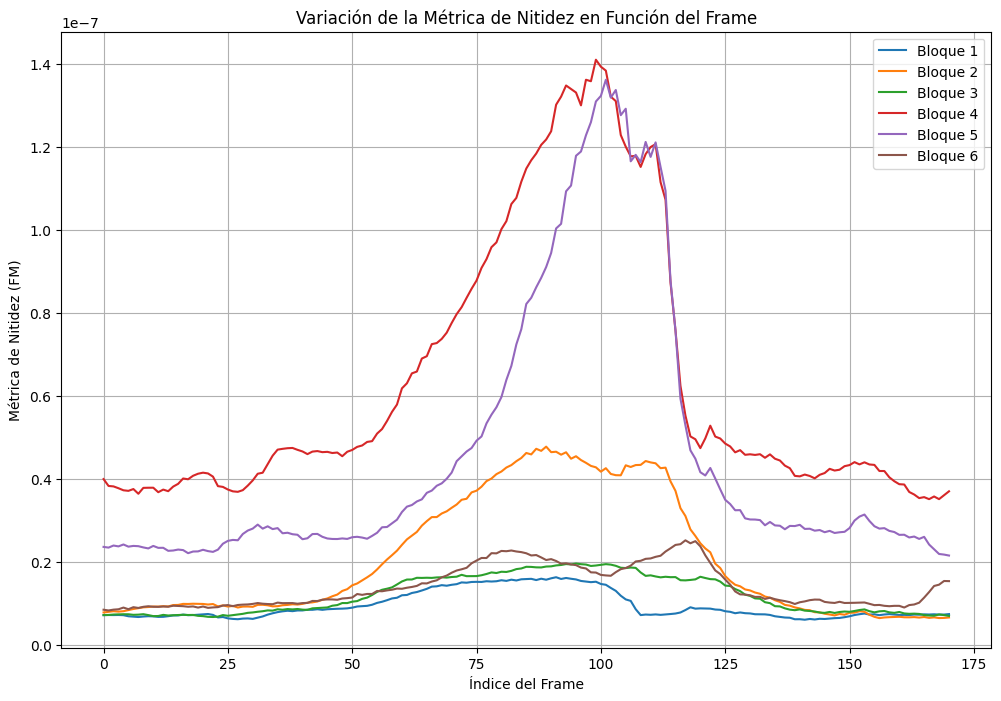

Bloque 1: Frame 91 - FM máximo: 0.0000000163
Bloque 2: Frame 89 - FM máximo: 0.0000000478
Bloque 3: Frame 95 - FM máximo: 0.0000000196
Bloque 4: Frame 99 - FM máximo: 0.0000001411
Bloque 5: Frame 101 - FM máximo: 0.0000001363
Bloque 6: Frame 117 - FM máximo: 0.0000000252
Matriz de frames con el máximo FM para cada bloque (2x3):
[[ 91  89  95]
 [ 99 101 117]]
Output video saved to c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_with_2x3.avi


In [35]:
output_path = ruta_notebook + "/output_with_2x3.avi"  # El archivo de salida con los bordes resaltados
fm_values = process_video(video_path)
plot_fm(fm_values)
max_frame_matrix = print_max_fm(fm_values)
highlight_blocks(video_path, max_frame_matrix, output_path)

Considerando que:

|Bloque|Posición                   |
|------|---------------------------|
|1     |Esquina superior izquierda.| 
|2     |Parte superior central.    |
|3     |Esquina superior derecha.  |
|4     |Esquina inferior izquierda.|
|5     |Parte inferior central.    |
|6     |Esquina inferior derecha.  |

1.3.c Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores. En este caso usamos 4x3.

In [ ]:
"""La función para computar la métrica no se modifica"""

In [36]:
def process_video(video_path):
    """
    Calcula para cada bloque, en cada frame, el valor de la métrica.
    
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {frame_count}")
    fm_values = np.zeros((frame_count, 12))  # Update to 12 blocks

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray_frame.shape
        block_h, block_w = h // 4, w // 3  # Adjust block size for 4x3 partition
        
        for i in range(4):
            for j in range(3):
                block = gray_frame[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w]
                fm = compute_fm(block)
                if current_frame < frame_count:
                    fm_values[current_frame, i*3 + j] = fm
                else:
                    print(f"Warning: Frame index {current_frame} is out of bounds.")
        
        current_frame += 1

    cap.release()
    return fm_values


In [37]:
def print_max_fm(fm_values):
    """
    Almacena e imprime los frames donde se alcanza la máxima métrica
    de nitidez para cada bloque.

    """
    max_frame_matrix = np.zeros((4, 3), dtype=int)  # Update to 4x3 matrix
    for i in range(fm_values.shape[1]):
        max_value = np.max(fm_values[:, i])
        max_frame = np.argmax(fm_values[:, i])
        row, col = divmod(i, 3)
        max_frame_matrix[row, col] = max_frame
        print(f'Bloque {i + 1}: Frame {max_frame} - FM máximo: {max_value:.10f}')
    
    print("Matriz de frames con el máximo FM para cada bloque (4x3):")
    print(max_frame_matrix)
    
    return max_frame_matrix


In [ ]:
"""La función para plotear la métrica por bloque no se modifica"""

In [38]:
def highlight_blocks(video_path, max_frame_matrix, output_path):
    """
    Crea el video de salida donde se resaltan en verde los frames
    cuando cada bloque alcanza el máximo valor de la métrica de nitidez
    que le corresponde.
    
    """
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    block_h, block_w = h // 4, w // 3  # Adjust block size for 4x3 partition

    current_frame = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Draw grid
        for i in range(1, 4):
            cv2.line(frame, (0, i * block_h), (w, i * block_h), (0, 0, 255), 2)  # Red horizontal line
        for j in range(1, 3):
            cv2.line(frame, (j * block_w, 0), (j * block_w, h), (0, 0, 255), 2)  # Red vertical line
        
        # Highlight block edges in green if the current frame matches max_frame_matrix
        for i in range(4):
            for j in range(3):
                if current_frame == max_frame_matrix[i, j]:
                    cv2.line(frame, (j * block_w, i * block_h), ((j + 1) * block_w, i * block_h), (0, 255, 0), 2)  # Green top edge
                    cv2.line(frame, (j * block_w, (i + 1) * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green bottom edge
                    cv2.line(frame, (j * block_w, i * block_h), (j * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green left edge
                    cv2.line(frame, ((j + 1) * block_w, i * block_h), ((j + 1) * block_w, (i + 1) * block_h), (0, 255, 0), 2)  # Green right edge

        out.write(frame)
        current_frame += 1

    cap.release()
    out.release()
    print(f"Output video saved to {output_path}")


Total number of frames: 171


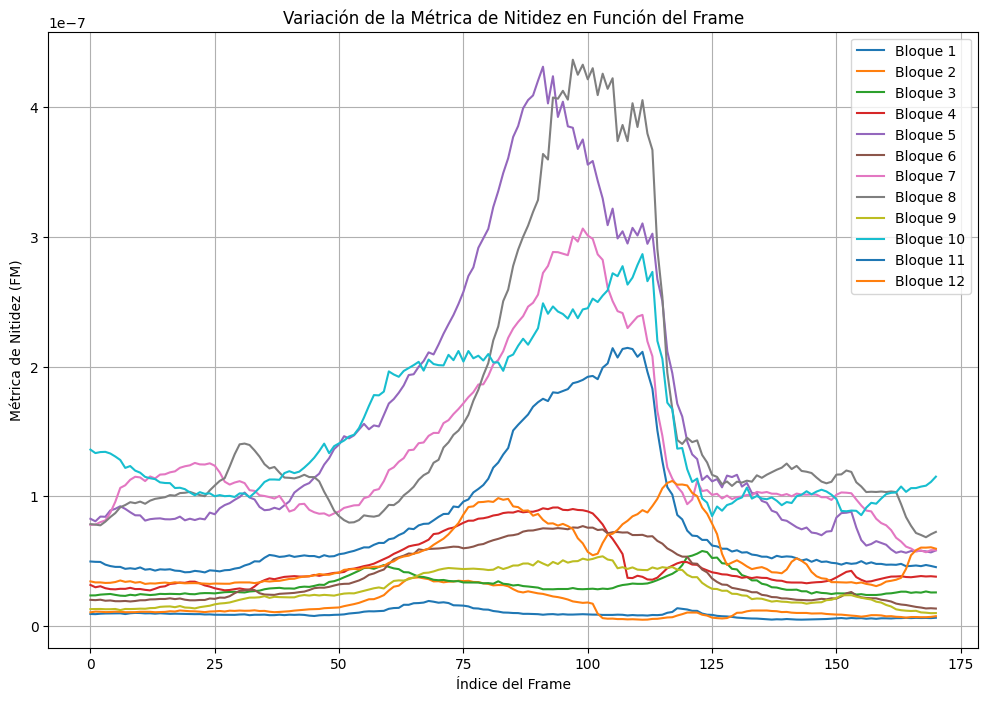

Bloque 1: Frame 68 - FM máximo: 0.0000000194
Bloque 2: Frame 66 - FM máximo: 0.0000000376
Bloque 3: Frame 123 - FM máximo: 0.0000000579
Bloque 4: Frame 94 - FM máximo: 0.0000000914
Bloque 5: Frame 91 - FM máximo: 0.0000004312
Bloque 6: Frame 99 - FM máximo: 0.0000000771
Bloque 7: Frame 99 - FM máximo: 0.0000003064
Bloque 8: Frame 97 - FM máximo: 0.0000004366
Bloque 9: Frame 103 - FM máximo: 0.0000000538
Bloque 10: Frame 111 - FM máximo: 0.0000002868
Bloque 11: Frame 108 - FM máximo: 0.0000002145
Bloque 12: Frame 117 - FM máximo: 0.0000001119
Matriz de frames con el máximo FM para cada bloque (4x3):
[[ 68  66 123]
 [ 94  91  99]
 [ 99  97 103]
 [111 108 117]]
Output video saved to c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_with_4x3.avi


In [39]:
output_path = ruta_notebook + "/output_with_4x3.avi"  # El archivo de salida con los bordes resaltados
fm_values = process_video(video_path)
plot_fm(fm_values)
max_frame_matrix = print_max_fm(fm_values)
highlight_blocks(video_path, max_frame_matrix, output_path)

Considerando que:

|Bloque|Posición      |
|------|--------------|
|1     |    (1,1)     | 
|2     |    (1,2)     |
|3     |    (1,3)     |
|4     |    (2,1)     |
|5     |    (2,2)     |
|6     |    (2,3)     |
|7     |    (3,1)     |
|8     |    (3,2)     |
|9     |    (3,3)     |
|10    |    (4,1)     |
|11    |    (4,2)     |
|12    |    (4,3)     |

### Conclusiones:

La siguiente tabla muestra los resultados entre los experimentos 1 y 2:

|Experimento    |Nº de Frame|  FM  |
|---------------|-----------|------|
|Frame completo |    109    |0.0286|
|ROI central 5% |    111    |0.4635|

Se observó que considerando la ROI centrada el valor de la métrica alcanzó un valor superior, lo que indica que en esa región es donde se concentra la mayor cantidad de píxeles con frecuencias eleveadas. Es decir ela región donde más nítidez presenta el video para los frames en donde se busca el foco.

Por otro lado, comparando las curvas de la métrica en función del frame, se apreció que el máximo en el caso del uso de ROI tiene un ancho (rango del dominio: frames), menor que considerando la totalidad de la imagen. Esto mostró que en el centro de la imagen la puesta en foco dura menos que considerando la totalidad de la imagen en la que se incluye la puesta en foco de los bordes.

A continuación se presentan las matrices de enfoque (3x3, 2x3 y 4x3 respectivamente) que almacenaron el número de frame en el que los bloques registran el máximo de métrica:

$$
\begin{bmatrix}
69 & 93 & 123 \\
99 & 103 & 95 \\
111 & 109 & 117
\end{bmatrix}
$$

$$
\begin{bmatrix}
91 & 89 & 95 \\
99 & 101 & 117
\end{bmatrix}
$$

$$
\begin{bmatrix}
68 & 66 & 123 \\
94 & 91 & 99 \\
99 & 97 & 103 \\
111 & 108 & 117
\end{bmatrix}
$$

Ante todo se observó que la nitidez de los bloques aumenta desde la esquina superior izquierda hacia la esquina inferior derecha. Además, comparando las curvas de métrica vs frame, se vió que al aumentar la cantidad de bloque de la matriz de enfoque las curvas presentan más ruido.

#### Bibliografia

Kanjar and Masilamani. 2013. Image Sharpness Measure for Blurred Images in Frequency Domain. Procedia Engineering 64 ( 2013 ) 149 – 158.